In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [4]:
df_boston = pd.read_csv("Boston House Prices.csv")

In [5]:
df_boston

,Rooms,Distance,Value
0,6.575,4.0900,24.0
1,6.421,4.9671,21.6
2,7.185,4.9671,34.7
3,6.998,6.0622,33.4
4,7.147,6.0622,36.2
...,...,...,...
501,6.593,2.4786,22.4
502,6.120,2.2875,20.6
503,6.976,2.1675,23.9
504,6.794,2.3889,22.0


In [7]:
# define the dependent and independent values
x = df_boston[["Rooms", "Distance"]]
y = df_boston["Value"]

In [10]:
# adding constant and fit the model
x = sm.add_constant(x)
lm = sm.OLS(y, x).fit()

In [11]:
lm.predict(x)

0      25.232623
1      24.305975
2      31.030253
3      29.919727
4      31.231138
         ...    
501    24.603318
502    20.346831
503    27.822178
504    26.328552
505    19.661029
Length: 506, dtype: float64

In [12]:
# regression table
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     247.0
Date:                Tue, 09 Sep 2025   Prob (F-statistic):           1.84e-75
Time:                        14:01:16   Log-Likelihood:                -1667.1
No. Observations:                 506   AIC:                             3340.
Df Residuals:                     503   BIC:                             3353.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6361      2.621    -13.212      0.000     -39.786     -29.486
Rooms          8.8014      0.424     20.780      0.000       7.969       9.634
Distance       0.4888      0.141      3.459      0.001       0.211       0.767
==============================================================================
Omnibus:                      142.807   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              844.520
Skew:                           1.090   Prob(JB):                    4.12e-184
Kurtosis:                       8.942   Cond. No.                         68.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# linear equatio: y = ax + b
y_pred = 8.8014*x["Rooms"] + 0.4888*x["Distance"] - 34.6361

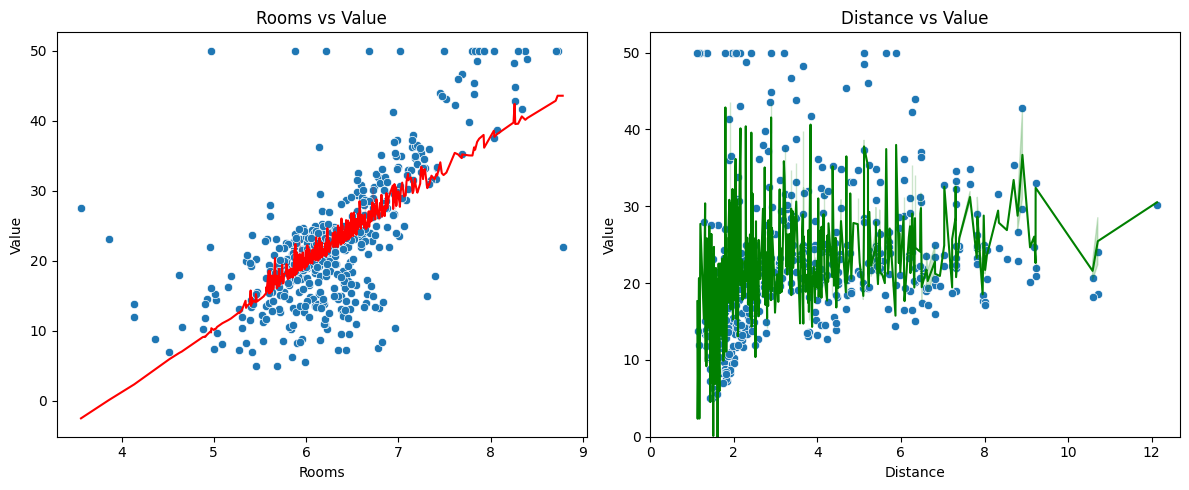

In [15]:
# plotting the linear regression
plt.figure(figsize=(12,5), tight_layout=True)
plt.subplot(1,2,1)
sns.scatterplot(x=x["Rooms"], y=y)
sns.lineplot(x=x["Rooms"], y=y_pred, color="red")
plt.title("Rooms vs Value")
plt.subplot(1,2,2)
sns.scatterplot(x=x["Distance"], y=y)
sns.lineplot(x=x["Distance"], y=y_pred, color="green")
plt.title("Distance vs Value")
plt.xlim(0)
plt.ylim(0)
plt.show()